<a href="https://colab.research.google.com/github/vamshivarma1122/oasis-infobyte/blob/main/Customer_Segmentation_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv', encoding='latin1')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df = df.rename(columns={'InvoiceNo':'INV_NO','StockCode':'S_CODE','Description':'DESC','Quantity':'QUANTITY','InvoiceDate':'INV_DATE','UnitPrice':'UNIT_PRICE','CustomerID':'CUST_ID'})
df

,CUST_ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CUST_ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
Duplicate_rows = df[df.duplicated()]
Duplicate_rows

,CUST_ID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
Duplicate_rows.shape

(0, 5)

In [ ]:
df.count()

CUST_ID                   200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head()

,CUST_ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.count()

CUST_ID                   200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [ ]:
df.isnull().sum()

CUST_ID                   0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.count()

CUST_ID                   200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [ ]:
df.isnull().sum()

CUST_ID                   0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
print(df.columns)

Index(['CUST_ID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


<Axes: xlabel='CUST_ID'>

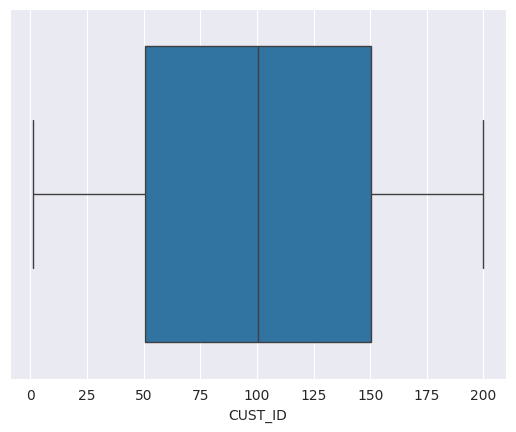

In [ ]:
sns.boxplot(x = df['CUST_ID'])

<Axes: xlabel='Age'>

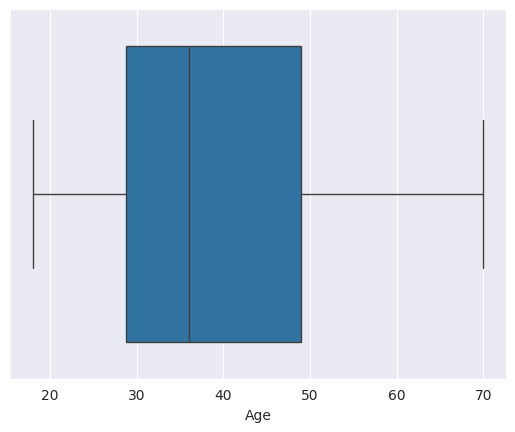

In [ ]:
sns.boxplot(x = df['Age'])

In [ ]:
df['CUST_ID'] = df['CUST_ID'].astype('object')

In [ ]:
df['Annual Income (k$)'] = pd.to_datetime(df['Annual Income (k$)'])
df['Month'] = df['Annual Income (k$)'].dt.month_name()
df['DayOfWeek'] = df['Annual Income (k$)'].dt.day_name()

In [ ]:
monthly_sales = df.groupby('Month')['Spending Score (1-100)'].sum()

<ipython-input-74-2160834cb922>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')


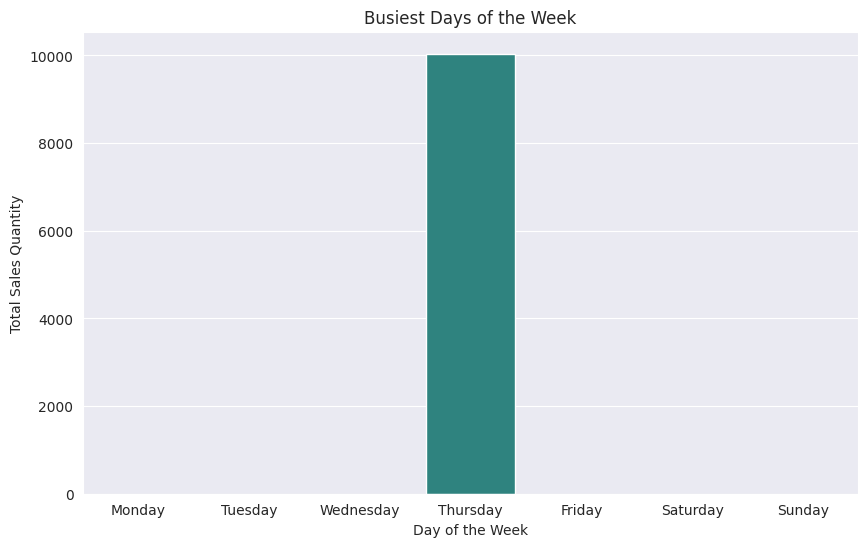

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = df.groupby('DayOfWeek')['Spending Score (1-100)'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.title('Busiest Days of the Week')
plt.show()

<ipython-input-75-78bf60ecc858>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


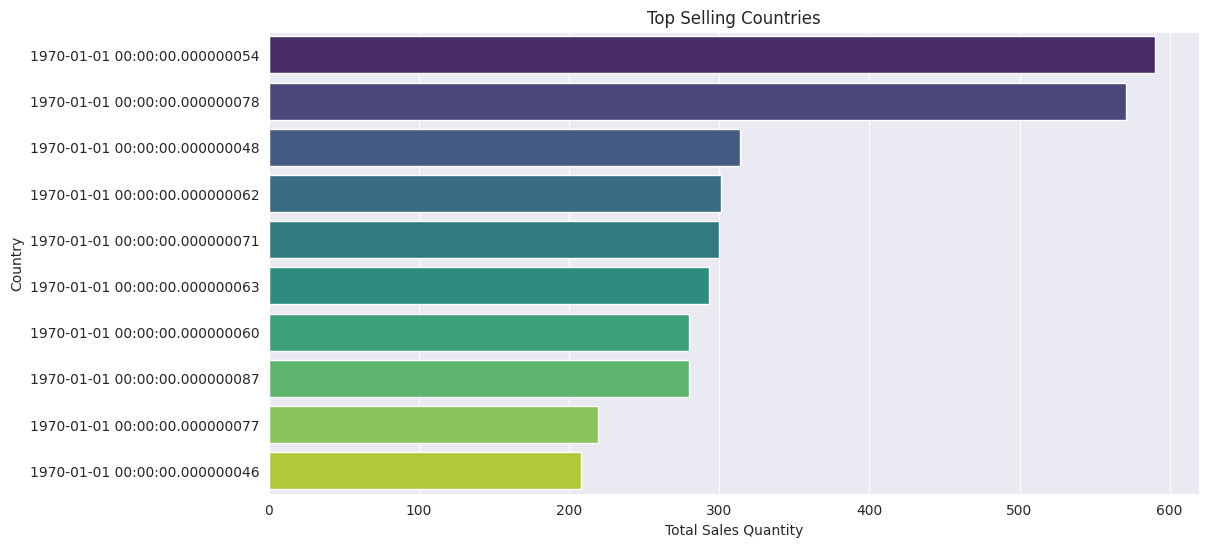

In [ ]:
top_countries = df.groupby('Annual Income (k$)')['Spending Score (1-100)'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Country')
plt.title('Top Selling Countries')
plt.show()

<ipython-input-76-ca3c93225bdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Spending Score (1-100)'], palette='viridis')


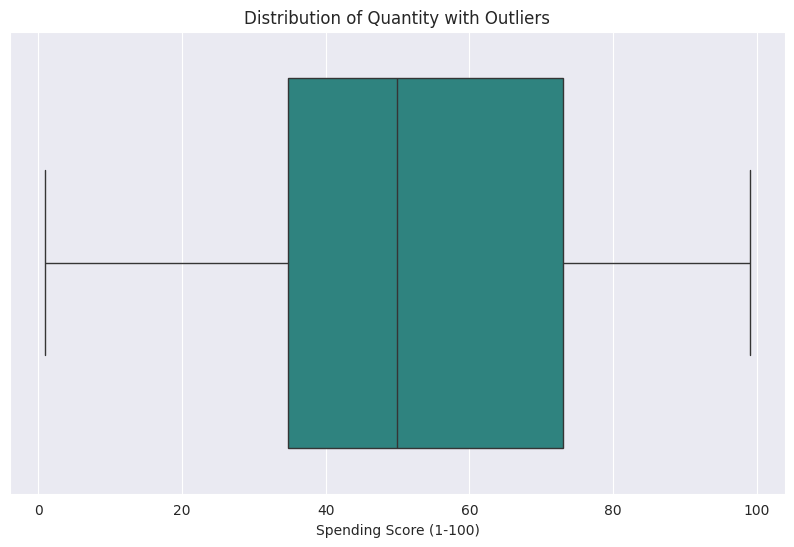

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Spending Score (1-100)'], palette='viridis')
plt.xlabel('Spending Score (1-100)')
plt.title('Distribution of Quantity with Outliers')
plt.show()